# Iowa liquor sales
 This data has over 20million rows and 24 columns, and it updates one time per month.
<a href ='https://data.iowa.gov/Sales-Distribution/Iowa-Liquor-Sales/m3tr-qhgy' >Click here</a> to see more detail information about feature description.
This table has a relational structure and all columns have strict constraints on type.


In [3]:
import pandas as pd
from pandas.io import gbq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import os

# system environment for google app
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = r"vertical-reason-296717-535f4272ed81.json"

query = 'SELECT * FROM bigquery-public-data.iowa_liquor_sales.sales limit 10'

df = pd.read_gbq(query,project_id='vertical-reason-296717',dialect='standard')

#show all column names
columns = df.columns

print(columns)


Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons'],
      dtype='object')


###  Researching features
First we will looking at features that maybe has mapping relations and see on rows with empty fields. 
Some queries to BGQ during analysis were repeated, because the have fast execution time.
#### category and category_name

In [71]:

query = 'SELECT  category,category_name,count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales group by category, category_name '

query_null = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where category_name is null '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

df1 = pd.read_gbq(query_null,project_id='vertical-reason-296717')

df['category_name_'] = df['category_name'].str.lower()
df['f0_'] = df['f0_']*100 / df['f0_'].sum()
df = df.sort_values(by=['f0_'],ascending=False)

print("number rows without category",df1)
print('amount of unique number',len(df['category'].unique()))
print('amount of unique number before low',len(df['category_name'].unique()))
print('amount of unique number after low',len(df['category_name_'].unique()))

number rows without category      f0_
0  25040
amount of unique number 112
amount of unique number before low 135
amount of unique number after low 112


In [53]:
df[['category','category_name_','category_name']].head(n=30)

,category,category_name_,category_name
109,1031100,american vodkas,American Vodkas
107,1031080,vodka 80 proof,VODKA 80 PROOF
122,1012100,canadian whiskies,Canadian Whiskies
121,1012100,canadian whiskies,CANADIAN WHISKIES
139,1011200,straight bourbon whiskies,Straight Bourbon Whiskies
138,1011200,straight bourbon whiskies,STRAIGHT BOURBON WHISKIES
135,1031200,american flavored vodka,American Flavored Vodka
97,1062310,spiced rum,SPICED RUM
98,1062400,spiced rum,Spiced Rum
114,1081600,whiskey liqueur,Whiskey Liqueur


data has 112 unique categories. Some records  have empty category_name but have category. So it can be mapped. Also we have only 16thousand empties in category field, so it  can will be removed.

#### store_name, store number and addres_of_store and  location

In [6]:


query = 'SELECT  store_number, store_name,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales group by store_number,store_name '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print('unique store number=',len(df['store_number'].unique()))
print('unique store name=',len(df['store_name'].unique()))
df = df.groupby('store_name').agg({'store_number' : ['count']})
df.columns = ['count']
print('count of stores which have more than 1 number=',len(df[df['count']>1]))

unique store number= 2553
unique store name= 2709
count of stores which have more than 1 number= 106


store_name and store_number dont have empties, while address and location have.

#### city, zip_code 


In [7]:
query = 'SELECT  city,  zip_code,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales  group by city,  zip_code '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

df['city_'] = df['city'].str.lower()
print("number unique values of city and zip code ")
print('city before lowcase',len(df['city'].unique()))
print('city after lowcase',len(df['city_'].unique()))
print('zip code',len(df['zip_code'].unique()))

#empties in city
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where city is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without city ")
print(df)

#empties in zip code
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where zip_code is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without zip code ")
print(df)




number unique values of city and zip code 
city before lowcase 840
city after lowcase 458
zip code 493
amount of rows without city 
     f0_
0  79982
amount of rows without zip code 
     f0_
0  80027


In [131]:
query = 'SELECT  city,  zip_code,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales  group by city,  zip_code '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

df['city_'] = df['city'].str.lower()

#zip codes with several zip cities
df = df.groupby('zip_code').agg({'city' : ['count']})
df.columns = ['count']
print('zip codes   which have more than 1 sities=')
df[df['count']>1].sort_values(by='count',ascending=False)

zip codes   which have more than 1 sities=


,count
zip_code,
50322,7
50702,6
52501,5
52641,4
51632,4
...,...
50583,2
50581,2
50579,2


we have records where different cities have same zip code. But this is not can be true. So we will not rely on this field and leave only city

#### county_number, county


In [77]:
query = """SELECT  county_number, county,  count(invoice_and_item_number) 
FROM bigquery-public-data.iowa_liquor_sales.sales 
where county_number is not null
group by county_number, county """


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
def number_mapping(x):
    if x[0]=='0' and len(x)>1 and x is not None:
        return x[1:]
    return x
df['county_number_']=df['county_number'].map(number_mapping)
df['county_'] = df['county'].str.lower()
print("number unique county ")
print('county_number after decimal validated',len(df['county_number_'].unique()))
print('county_number before decimal validated',len(df['county_number'].unique()))
print('county after lowcase',len(df['county_'].unique()))
print('county before lowcase',len(df['county'].unique()))

#empties in zip code
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where county_number is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without county_number ")
print(df)


#empties in zip code
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where county is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without county ")
print(df)







number unique county 
county_number before decimal validated 99
county_number after decimal validated 108
county after lowcase 103
county before lowcase 200
amount of rows without county_number 
      f0_
0  156787
amount of rows without county 
      f0_
0  156785


In [132]:
query = """SELECT  county_number, county,  count(invoice_and_item_number) 
FROM bigquery-public-data.iowa_liquor_sales.sales 
where county_number is not null
group by county_number, county """

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
def number_mapping(x):
    if x[0]=='0' and len(x)>1:
        return x[1:]
    return x
df['county_number_']=df['county_number'].map(number_mapping)
df['county_'] = df['county'].str.lower()

#counties with several numbers
df = df.groupby('county_number_').agg({'county_' : ['count']})
df.columns = ['count']
print('number   which have more than 1 county=')
df[df['count']>1].sort_values(by='count',ascending=False)

number   which have more than 1 county=


,count
county_number_,
1,3
17,3
7,3
8,3
78,3
95,2
75,2
73,2
72,2


we have county numbers which have several counties in records. But it is the same county. So county number will considered. And number with one decimal place have two variants of writing (2 and 02 for example).

#### vendor_number and vendor_name

In [66]:
query ="""SELECT  vendor_number, vendor_name,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales  
where vendor_number is not null
group by vendor_number, vendor_name
"""


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
def number_mapping(x):
    if x[0]=='0' and len(x)>1:
        return x[1:]
    return x
df['vendor_number_']=df['vendor_number'].map(number_mapping)
df['vendor_name_'] = df['vendor_name'].str.lower()
print("number unique vendor number and name")
print('vendor number',len(df['vendor_number'].unique()))
print('vendor number after remove 0 from first decimal',len(df['vendor_number_'].unique()))
print('vendor name after low',len(df['vendor_name_'].unique()))
print('vendor name before low',len(df['vendor_name'].unique()))

#vendors with several numbers
df1 = df.groupby('vendor_number').agg({'vendor_name_' : ['count']})
df1.columns = ['count']
print('count of vendor_number   which have more than 1 name=')
df1 = df1[df1['count']>1].sort_values(by='count',ascending=False).reset_index()
print(len(df1['vendor_number']))
pd.options.display.max_rows = 300


#empties in vendor number
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where vendor_number is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without vendor_number ")
print(df)


#empties in zip code
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where vendor_name is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without vendor ")
print(df)

number unique vendor number and name
vendor number 372
vendor number after remove 0 from first decimal 362
vendor name after low 472
vendor name before low 509
count of vendor_number   which have more than 1 name=
114
amount of rows without vendor_number 
   f0_
0    7
amount of rows without vendor 
   f0_
0    5


In [70]:
query ="""SELECT  vendor_number, vendor_name,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales  
where vendor_number is not null
group by vendor_number, vendor_name """


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
df['vendor_name_'] = df['vendor_name'].str.lower()

#validated number
def number_mapping(x):
    if x[0]=='0' and len(x)>1:
        return x[1:]
    return x
df['vendor_number_']=df['vendor_number'].map(number_mapping)

#numbers with several names
df1 = df.groupby('vendor_number_').agg({'vendor_name_' : ['count']})
df1.columns = ['count']
df1 = df1[df1['count']>1].sort_values(by='count',ascending=False).reset_index()
print('count of vendor_number   which have more than 1 name=',len(df1))

pd.options.display.max_rows = 300
df1 = df1.merge(df,how='left', on=['vendor_number_'])
print('all vendor_number with more than 1 name')
df1[['vendor_number_','vendor_name_']].head(n=30)

count of vendor_number   which have more than 1 name= 124
all vendor_number with more than 1 name


,vendor_number_,vendor_name_
0,192,sidney frank importing co.
1,192,"mast-jagermeister us, inc"
2,192,"sidney frank importing company, inc."
3,192,"mast-jaegermeister us, inc"
4,803,levecke corporation
5,803,levecke corp
6,803,levecke corp.
7,803,levecke corp
8,214,goamericago beverages llc
9,214,goamericago beverages llc / whistlepig


Columns are almost filled in Table. We can use vendor_number, because this field has  several synonyms in mapping with vendor_name field.

#### item_number and item_description


In [11]:
query = 'SELECT  item_number, item_description,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales group by item_number, item_description '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

df['item_description_'] = df['item_description'].str.lower()

print("number rows unique of item number")
print('item description after low',len(df['item_description_'].unique()))
print('item number',len(df['item_number'].unique()))
print('item description before low',len(df['item_description'].unique()))

#description with several numbers
df1 = df.groupby('item_number').agg({'item_description_' : ['count']})
df1.columns = ['count']
print('count of item_description_   which have more than 1 number=')
df1 = df1[df1['count']>1].sort_values(by='count',ascending=False).reset_index()
print(len(df1))



#empties in item number
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where item_number is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without item_number ")
print(df)


#empties in item_description
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where item_description is null '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("amount of rows without item_description ")
print(df)




number rows unique of item number
item description after low 8943
item number 10037
item description before low 9075
count of item_description_   which have more than 1 number=
1558
amount of rows without item_number 
   f0_
0    0
amount of rows without item_description 
   f0_
0    0


In [69]:
query = 'SELECT  item_number, item_description,  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales group by item_number, item_description '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

df['item_description_'] = df['item_description'].str.lower()

#description with several numbers
df1 = df.groupby('item_number').agg({'item_description_' : ['count']})
df1.columns = ['count']
df1 = df1[df1['count']>1].sort_values(by='count',ascending=False).reset_index()


df1 = df1.merge(df,how='left', on=['item_number']).head(n=100)
print('all item_number with more than 1 description')
df1[['item_number','item_description_']].head(n=40)

all item_number with more than 1 description


,item_number,item_description_
0,22219,woodford reserve kentucky derby 2015
1,22219,woodford reserve kentucky derby 2016
2,22219,woodford reserve kentucky derby 2020
3,22219,woodford reserve kentucky derby 2019
4,22219,woodford reserve kentucky derby 2018
5,22219,woodford reserve kentucky derby 2017
6,16906,booker's 6yr
7,16906,bookers kitchen table batch
8,16906,bookers bourbon
9,16906,bookers beaten biscuits


There are no empty fields in item number and description. Item number determine the name of bottle of certain bottle .So this field has influence on cost

#### state_bottle_cost and state_bottle_retail

In [12]:
#query = 'SELECT  state_bottle_cost ,state_bottle_retail  FROM bigquery-public-data.iowa_liquor_sales.sales where state_bottle_cost is not null and state_bottle_retail is not null '

#df = pd.read_gbq(query,project_id='vertical-reason-296717')

#df1 = pd.read_gbq(query_1,project_id='vertical-reason-296717')

#print(df.info())
#print('corr')
#print(df['state_bottle_cost'].corr(df['state_bottle_retail']))

query = 'SELECT item_number, sum(state_bottle_cost) ,sum(state_bottle_retail)  FROM bigquery-public-data.iowa_liquor_sales.sales where state_bottle_cost is not null and state_bottle_retail is not null and item_number is not null group by item_number '
df = pd.read_gbq(query,project_id='vertical-reason-296717')
#print(df.info())

df['r'] = df['f1_'] / df['f0_']





In [13]:
df[(df['r']<=1.45) | (df['r']>=1.55) ]

,item_number,f0_,f1_,r
391,249,342.40,534.40,1.560748
853,42437,9055.57,14259.57,1.574674
1019,67513,1605.88,2490.02,1.550564
1077,64126,1846.30,2871.94,1.555511
1270,580,449.06,778.56,1.733755
2005,903903,2759.93,3592.64,1.301714
2099,2779,274.50,430.50,1.568306
2320,942403,365.40,610.65,1.671182
2389,53936,125.62,199.83,1.590750
2708,42444,13428.53,21104.28,1.571600


Iowa ABD sets 50% comission of costs on bottle (corr between state_bottle_cost and state_bottle_retail over 0.9999). However there are some item_number wich have commision out of range [1.45,1.55] ( maybe it depends on item_description which includes several item_number in records).

#### pack and bottles_sold
Pack is amount of bottles which vendor sells in a case, i assume that Iowa ABD buy all pack and certain retail store takes only some rate of pack, so this column has not valuable information, and we will work only with bottles_sold

#### Other features


In [128]:
#empties in bottle_volume_ml
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where bottle_volume_ml is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without bottle_volume_ml ")
print(df)

#empties in state_bottle_retail
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where state_bottle_retail is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without state_bottle_retail ")
print(df)

#empties in item_description
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where item_description is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without item_description ")
print(df)


#empties in bottles_sold
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where bottles_sold is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without bottles_sold ")
print(df)

#empties in sale_dollars
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where sale_dollars is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without sale_dollars ")
print(df)


#empties in volume_sold_liters
query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where volume_sold_liters is null '
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print("amount of rows without volume_sold_liters ")
print(df)

query = 'SELECT  count(invoice_and_item_number)  FROM bigquery-public-data.iowa_liquor_sales.sales where date is null '


pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')

print("number rows without date",df)
 

amount of rows without bottle_volume_ml 
   f0_
0    0
amount of rows without state_bottle_retail 
   f0_
0   10
amount of rows without item_description 
   f0_
0    0
amount of rows without bottles_sold 
   f0_
0    0
amount of rows without sale_dollars 
   f0_
0   10
amount of rows without volume_sold_liters 
   f0_
0    0


# volume sold and total cost ( general , vendor and kind of beverage)

## load  data to analyze main metrics by date in vendors and kind of beverage

In [148]:
query = """SELECT  sum(volume_sold_liters) as volume_sold_liters, sum(sale_dollars) as sale_dollars, 
DATETIME_TRUNC(date,MONTH) as date_trunc, category_name, vendor_number   FROM bigquery-public-data.iowa_liquor_sales.sales 
where volume_sold_liters is not null and volume_sold_liters>0 and sale_dollars is not null and sale_dollars>0 and
category_name is not null and vendor_number is not null 
group by date_trunc,category_name,vendor_number
"""

pd.options.display.max_rows = 200
DF = pd.read_gbq(query,project_id='vertical-reason-296717')


In [149]:
#additioanl features
from math import log

DF['volume_persentage'] = DF['volume_sold_liters'] / DF['volume_sold_liters'].sum()
DF['cost_persentage'] = DF['sale_dollars'] / DF['sale_dollars'].sum()
DF['volume_log']=DF['volume_sold_liters'].map(lambda t:log(t))
DF['cost_log']=DF['sale_dollars'].map(lambda t:log(t))
DF['date_Month']=DF['date_trunc'].dt.to_period("M")
DF['date_Year']=DF['date_trunc'].dt.year
DF['category_name_low'] = DF['category_name'].str.lower()

def category_mapping(x):
    for i in ['whiskies','rum','vodka','liqueur','tequila','schnapps','cocktails','gins','brandie']:
        if i in x:
            return i
    return 'other'
DF['category_mapped'] = DF['category_name_low'].map(category_mapping)
def number_mapping(x):
    if x[0]=='0' and len(x)>1:
        return x[1:]
    return x
DF['vendor_number']=DF['vendor_number'].map(number_mapping)



print(DF.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59281 entries, 0 to 59280
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   volume_sold_liters  59281 non-null  float64       
 1   sale_dollars        59281 non-null  float64       
 2   date_trunc          59281 non-null  datetime64[ns]
 3   category_name       59281 non-null  object        
 4   vendor_number       59281 non-null  object        
 5   volume_persentage   59281 non-null  float64       
 6   cost_persentage     59281 non-null  float64       
 7   volume_log          59281 non-null  float64       
 8   cost_log            59281 non-null  float64       
 9   date_Month          59281 non-null  period[M]     
 10  date_Year           59281 non-null  int64         
 11  category_name_low   59281 non-null  object        
 12  category_mapped     59281 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), ob

### Lets investigate the volume of alchohol 
histogram of orderes **volume_sold_liters** (loading to pandas of this query executed roughly an hour)

       volume_sold_liters           log
count        2.073600e+07  2.073600e+07
mean         9.134386e+00  1.445545e+00
std          3.381041e+01  1.247848e+00
min          2.000000e-02 -3.912023e+00
25%          1.500000e+00  4.054651e-01
50%          4.800000e+00  1.568616e+00
75%          1.050000e+01  2.351375e+00
max          1.500000e+04  9.615805e+00


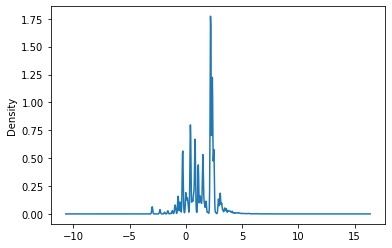

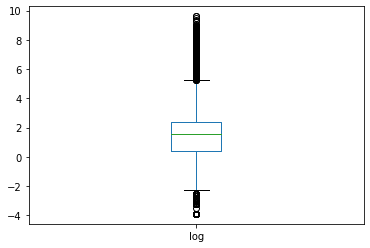

In [142]:
query = 'SELECT  volume_sold_liters  FROM bigquery-public-data.iowa_liquor_sales.sales where volume_sold_liters is not null and volume_sold_liters>0'
from math import log
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
df['log'] = df['volume_sold_liters'].map(lambda t:log(t))
print(df.describe())
df['log'].plot.kde()
plt.show()
df['log'].plot.box()
plt.show()

In [140]:
query = 'SELECT  count(volume_sold_liters)  FROM bigquery-public-data.iowa_liquor_sales.sales where volume_sold_liters=0 or volume_sold_liters is null'
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
print(df)

   f0_
0   10


total hist of volume_sold by **year-month**

<AxesSubplot:xlabel='date_Month'>

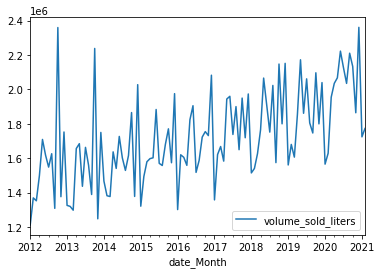

In [150]:
DF1=DF.groupby('date_Month').agg({'volume_sold_liters':'sum'})
DF1.plot()

Vendors

In [151]:
DF_vendor=DF.groupby('vendor_number').agg({'volume_persentage':'sum'})
DF_vendor.columns=['volume_persentage']
DF_vendor=DF_vendor.sort_values(by='volume_persentage',ascending=False)
DF_vendor['cum']=DF_vendor.cumsum()


In [152]:
pd.options.display.max_rows = 80

#ABC column
def abc(x):
    if x<=0.8:
        return 'A'
    elif x>0.8 and x<=0.95:
        return 'B'
    else:
        return 'C'
DF_vendor['ABC']=DF_vendor['cum'].map(abc)

#XYZ column
DF_vendor_xyz = DF.pivot_table(index = 'vendor_number',values='volume_sold_liters',aggfunc='sum',columns = ['date_Month'])
DF_vendor['XYZ'] = DF_vendor_xyz.std(axis=1)/DF_vendor_xyz.mean(axis=1)
def xyz(x):
    if x<=0.1:
        return 'X'
    elif x>0.1 and x<=0.25:
        return 'Y'
    else:
        return 'Z'
DF_vendor['XYZ']=DF_vendor['XYZ'].map(xyz)

DF_vendor.head(n=70).style.background_gradient(cmap='viridis')   

,volume_persentage,cum,ABC,XYZ
vendor_number,,,,
260,0.157735,0.157735,A,Y
434,0.115005,0.272741,A,Y
421,0.079032,0.351772,A,Z
65,0.077170,0.428943,A,Y
115,0.076786,0.505729,A,Z
55,0.071644,0.577373,A,Y
370,0.050195,0.627569,A,Y
259,0.044105,0.671673,A,Z
380,0.037513,0.709186,A,Z


    kind of beverage

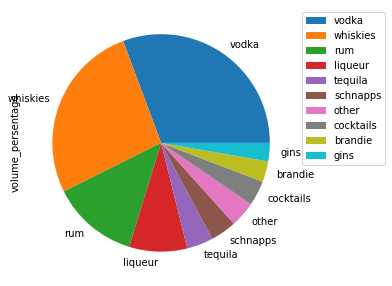

In [153]:
DF_bev=DF.groupby('category_mapped').agg({'volume_persentage':'sum'})
DF_bev.columns=['volume_persentage']
DF_bev=DF_bev.sort_values(by='volume_persentage',ascending=False)
DF_bev.plot.pie(y='volume_persentage', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1, 1))

In [154]:
DF_bev_plot1 = DF.pivot_table(index = 'date_Month',values='volume_sold_liters',aggfunc='sum',columns = ['category_mapped'])

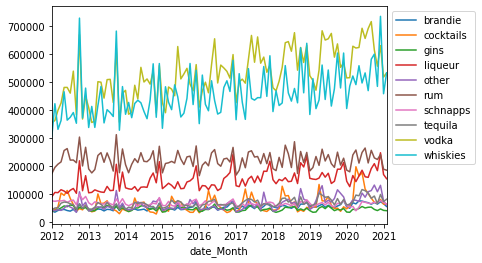

In [155]:
DF_bev_plot1.plot()
plt.legend(bbox_to_anchor=(1, 1))

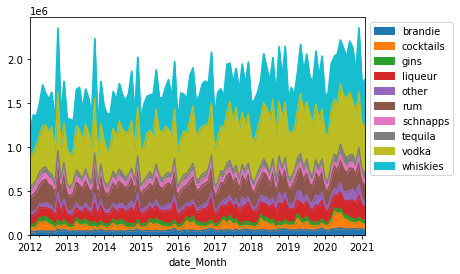

In [156]:
DF_bev_plot1.plot.area()
plt.legend(bbox_to_anchor=(1, 1))

### Lets investigate the cost of  of alchohol
histogram of orderes **sale_dollars** (loading to pandas of this query were executed roughly 1 hour)

       sale_dollars           log
count  2.073106e+07  2.073106e+07
mean   1.360560e+02  4.228493e+00
std    4.684804e+02  1.084520e+00
min    1.300000e+00  2.623643e-01
25%    3.181000e+01  3.459781e+00
50%    7.200000e+01  4.276666e+00
75%    1.413600e+02  4.951310e+00
max    2.795573e+05  1.254096e+01


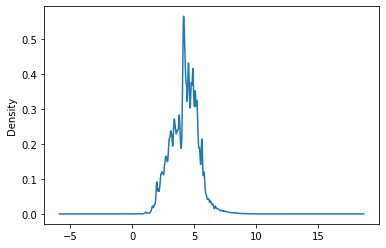

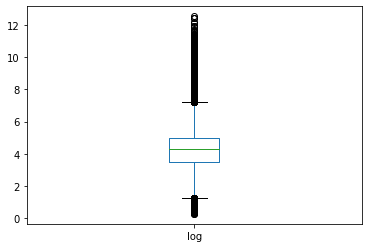

In [207]:
query = 'SELECT  sale_dollars  FROM bigquery-public-data.iowa_liquor_sales.sales where sale_dollars is not null and sale_dollars>0 '

pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
df['log'] = df['sale_dollars'].map(lambda t:log(t))
print(df.describe())
df['log'].plot.kde()
plt.show()
df['log'].plot.box()
plt.show()


total hist of sale_dollars by **year-month**

<AxesSubplot:xlabel='date_Month'>

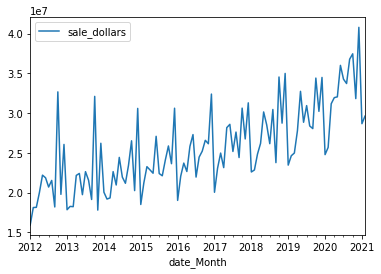

In [157]:
DF1=DF.groupby('date_Month').agg({'sale_dollars':'sum'})
DF1.plot()

Vendors

In [158]:
DF_vendor=DF.groupby('vendor_number').agg({'cost_persentage':'sum'})
DF_vendor.columns=['cost_persentage']
DF_vendor=DF_vendor.sort_values(by='cost_persentage',ascending=False)
DF_vendor['cum']=DF_vendor.cumsum()

In [159]:
pd.options.display.max_rows = 80
def abc(x):
    if x<=0.8:
        return 'A'
    elif x>0.8 and x<=0.95:
        return 'B'
    else:
        return 'C'
DF_vendor['ABC']=DF_vendor['cum'].map(abc)

DF_vendor_xyz = DF.pivot_table(index = 'vendor_number',values='sale_dollars',aggfunc='sum',columns = ['date_Month'])
DF_vendor['XYZ'] = DF_vendor_xyz.std(axis=1)/DF_vendor_xyz.mean(axis=1)
def xyz(x):
    if x<=0.1:
        return 'X'
    elif x>0.1 and x<=0.25:
        return 'Y'
    else:
        return 'Z'
DF_vendor['XYZ']=DF_vendor['XYZ'].map(xyz)
    

DF_vendor.head(n=40).style.background_gradient(cmap='viridis')   

,cost_persentage,cum,ABC,XYZ
vendor_number,,,,
260,0.214042,0.214042,A,Y
65,0.077413,0.291454,A,Y
421,0.073448,0.364902,A,Z
370,0.071716,0.436618,A,Y
434,0.058674,0.495293,A,Y
85,0.057207,0.552499,A,Z
115,0.053593,0.606092,A,Z
35,0.047678,0.653770,A,Y
55,0.034290,0.688060,A,Y


ABCXYZ analysis as for volume bottle above

    kind of beverage

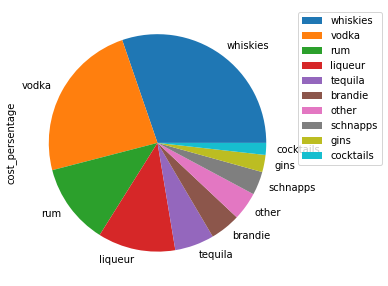

In [160]:
DF_bev=DF.groupby('category_mapped').agg({'cost_persentage':'sum'})
DF_bev.columns=['cost_persentage']
DF_bev=DF_bev.sort_values(by='cost_persentage',ascending=False)
DF_bev.plot.pie(y='cost_persentage', figsize=(5, 5))
plt.legend(bbox_to_anchor=(1, 1))

In [161]:
DF_bev_plot1 = DF.pivot_table(index = 'date_Month',values='sale_dollars',aggfunc='sum',columns = ['category_mapped'])

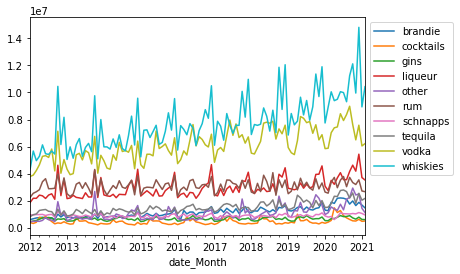

In [162]:
DF_bev_plot1.plot()
plt.legend(bbox_to_anchor=(1, 1))

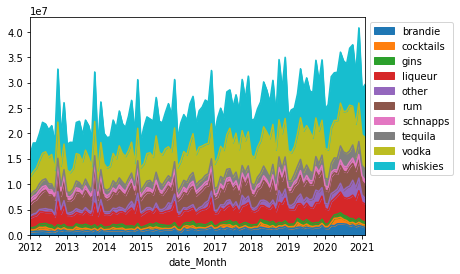

In [163]:
DF_bev_plot1.plot.area()
plt.legend(bbox_to_anchor=(1, 1))

We see that people in Iowa prefer to drink most popular beverages (vodka and whiskies), which consits of 2/3 from all ordered volume and cost
Also we observed that people have stable trend(linear) in both metrics, however at september 2012 and 2013 there were sharp leaps in consuming
The most 5 favourite vendors: 
* DIAGEO AMERICAS (20 %), 
* LUXCO INC (7.7 %),
* SAZERAC COMPANY INC (7.3 %),
* Jim Beam Brands (7.1 %),
* CONSTELLATION BRANDS INC (5.8 %)


### County

In [139]:
query = 'SELECT  sum(volume_sold_liters) as volume_sold_liters,sum(sale_dollars) as sale_dollars,county_number  FROM bigquery-public-data.iowa_liquor_sales.sales where county_number is not null group by  county_number'
pd.options.display.max_rows = 200
df = pd.read_gbq(query,project_id='vertical-reason-296717')
def number_mapping(x):
    if x[0]=='0' and len(x)>1:
        return x[1:]
    return x
df['county_number_']=df['county_number'].map(number_mapping)

df['volume_percentage'] = df['volume_sold_liters'] / df['volume_sold_liters'].sum()
df['sale_percentage']= df['sale_dollars'] / df['sale_dollars'].sum()
df1 = df.groupby('county_number_').agg({'volume_percentage':'sum','volume_sold_liters':'sum','sale_dollars':'sum','sale_percentage':'sum'})
df1['average']=df1['sale_dollars'] /df1['volume_sold_liters']

### top counties in volume sold


In [140]:
df2=df1.sort_values('volume_percentage',  ascending=False)
df2[['volume_percentage',]].head(n=30).style.background_gradient(cmap='viridis')

,volume_percentage
county_number_,
77,0.207692
57,0.088520
82,0.068342
52,0.055330
7,0.055136
78,0.034713
97,0.033571
85,0.031138
31,0.031069


### top counties in cost sold

In [141]:
df3=df1.sort_values('sale_percentage',  ascending=False)
df3[['sale_percentage',]].head(n=30).style.background_gradient(cmap='viridis')

,sale_percentage
county_number_,
77,0.226440
57,0.087616
82,0.072216
52,0.059732
7,0.056772
78,0.035576
97,0.034474
85,0.030439
31,0.030396


### top counties in avg sold

In [142]:
df4=df1.sort_values('average',  ascending=False)
df4[['average',]].head(n=30).style.background_gradient(cmap='viridis')

,average
county_number_,
77,16.233875
52,16.074579
25,16.046422
82,15.733918
7,15.331690
97,15.290270
78,15.259858
92,15.114181
51,14.978224


rank corr between volume, cost and avg(cost per 1l)

In [143]:
df1[['average','volume_sold_liters','sale_dollars']].corr(method='kendall').style.background_gradient(cmap='viridis')

,average,volume_sold_liters,sale_dollars
average,1.000000,0.400948,0.425273
volume_sold_liters,0.400948,1.000000,0.975675
sale_dollars,0.425273,0.975675,1.000000


In [146]:
df1[['average','volume_sold_liters','sale_dollars']].corr(method='spearman').style.background_gradient(cmap='viridis')

,average,volume_sold_liters,sale_dollars
average,1.000000,0.553123,0.579617
volume_sold_liters,0.553123,1.000000,0.998627
sale_dollars,0.579617,0.998627,1.000000


In [147]:
df1[['average','volume_sold_liters','sale_dollars']].corr(method='pearson').style.background_gradient(cmap='viridis')

,average,volume_sold_liters,sale_dollars
average,1.000000,0.532147,0.529223
volume_sold_liters,0.532147,1.000000,0.999255
sale_dollars,0.529223,0.999255,1.000000


The most populated counties drink more alchohol and the same situation with total cost (this  reason   grouping by cities too).
However the most rich counties are not the most populated, because the avg cost/1l doesn't have the ranked correlation with total volume and  cost. 
Maybe the profit way is setting some discounts at september, october and concentrating on more rich counties.